In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

### Read in data:

In [2]:
# ELena's flights_with_weather data contains flights for top 10 locations over Dec-Jan 2018 and Dec-Jan 2019
# Passenger data contains ROUTE SPECIFIC data for the entire MONTH

#flights = pd.read_csv('flights_with_weather.csv')
#flights = pd.read_csv('flights_weather_holiday.csv')
flights = pd.read_csv('flights_weather_holiday.csv')
#flights = pd.read_csv('test_flights_weath_hol_wkday_first_week_only.csv')
passengers = pd.read_csv('passengers_jan-dec_18-19.csv')

In [3]:
flights = flights.sort_values(by=['fl_date'])

In [4]:
flights

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,total_add_gtime,longest_add_gtime,day_of_the_week,origin_wind_speed,origin_visibility,origin_conditions,dest_wind_speed,dest_visibility,dest_conditions,holiday
60659,2018-01-01,UA,UA,UA,745,UA,N848UA,745,12953,LGA,...,NaN,NaN,Monday,14.8,9.9,Clear,12.3,9.1,Partially cloudy,True
23125,2018-01-01,UA,UA_CODESHARE,UA,3582,YX,N649RW,3582,11298,DFW,...,NaN,NaN,Monday,15.0,9.9,Partially cloudy,12.3,9.1,Partially cloudy,True
3646,2018-01-01,UA,UA,UA,1591,UA,N87527,1591,11298,DFW,...,NaN,NaN,Monday,15.0,9.9,Partially cloudy,5.6,4.2,Clear,True
73558,2018-01-01,WN,WN,WN,5500,WN,N8685B,5500,11292,DEN,...,NaN,NaN,Monday,12.3,9.1,Partially cloudy,14.6,9.9,Partially cloudy,True
77601,2018-01-01,WN,WN,WN,415,WN,N8690A,415,12892,LAX,...,NaN,NaN,Monday,5.6,4.2,Clear,12.7,9.9,Clear,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140619,2019-12-31,NK,NK,NK,918,NK,N905NK,918,11292,DEN,...,NaN,NaN,Tuesday,11.8,9.9,Clear,6.1,9.9,Clear,False
106829,2019-12-31,WN,WN,WN,4807,WN,N277WN,4807,13232,MDW,...,NaN,NaN,Tuesday,25.3,7.9,"Snow, Overcast",15.3,8.7,Overcast,False
106104,2019-12-31,AA,AA,AA,598,AA,N741UW,598,12953,LGA,...,NaN,NaN,Tuesday,19.3,9.6,"Rain, Partially cloudy",13.2,9.9,Clear,False
103182,2019-12-31,UA,UA_CODESHARE,UA,3466,YX,N654RW,3466,11278,DCA,...,NaN,NaN,Tuesday,15.3,8.7,Overcast,25.3,7.9,"Snow, Overcast",False


In [5]:
flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'day_of_the_week', 'origin_wind_speed',
       'origin_visibility', 'origin_conditions', 'dest_wind_speed',
       'dest_visibility', 'dest_conditions', 'holiday'],
      dtype='object')

In [6]:
flights['fl_date']

60659     2018-01-01
23125     2018-01-01
3646      2018-01-01
73558     2018-01-01
77601     2018-01-01
             ...    
140619    2019-12-31
106829    2019-12-31
106104    2019-12-31
103182    2019-12-31
170119    2019-12-31
Name: fl_date, Length: 207272, dtype: object

In [7]:
flights['dest_city_name'].unique() # will have to rename the city names to coincide with passengers

array(['denver', 'los angeles', 'atlanta', 'chicago', 'new york',
       'dallas/fort worth', 'charlotte', 'seattle', 'washington',
       'houston'], dtype=object)

In [8]:
passengers.head()

,departures_scheduled,departures_performed,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,unique_carrier,unique_carrier_name,aircraft_type,origin_airport_id,origin_city_market_id,origin_city_name,dest_airport_id,dest_city_market_id,dest_city_name,year,month
0,54,53,9437,7536,49137,3689,1660,11961,10273,AS,Alaska Airlines Inc.,888,14747,30559,"Seattle, WA",11298,30194,"Dallas/Fort Worth, TX",2018,1
1,54,54,4104,3583,0,0,1235,12055,9782,OO,SkyWest Airlines Inc.,673,11298,30194,"Dallas/Fort Worth, TX",12892,32575,"Los Angeles, CA",2018,1
2,54,54,4104,3841,0,0,954,9305,7223,OO,SkyWest Airlines Inc.,673,14747,30559,"Seattle, WA",12892,32575,"Los Angeles, CA",2018,1
3,54,53,9275,7655,12897,0,1452,9941,8887,WN,Southwest Airlines Co.,614,11292,30325,"Denver, CO",12264,30852,"Washington, DC",2018,1
4,54,49,7721,6146,13844,1904,760,6457,4907,DL,Delta Air Lines Inc.,694,10397,30397,"Atlanta, GA",12478,31703,"New York, NY",2018,1


# Set some new columns:
- Year
- Month
- Weekday (as number)
- Hour (24hour clock)
- Holiday (1 for yes, 0 for no)
- Holiday_Weekend (1 for yes, 0 for no)

In [9]:
# year
year_vector = []
for i in flights['fl_date'].values:
    year_vector.append(i[0:4])

flights['year'] = year_vector

In [10]:
# month
month_vector = []
for i in flights['fl_date'].values:
    month_vector.append(i[5:7])

flights['month'] = month_vector

In [11]:
flights['day_of_the_week'].value_counts()

Monday       32897
Tuesday      31587
Wednesday    31058
Sunday       30056
Thursday     29977
Friday       28487
Saturday     23210
Name: day_of_the_week, dtype: int64

In [12]:
#
# NOTE: I have commented this out because I believe it might be better to one_hot_encode these to identify the data better
#

# # weekday
# weekday_dict = {
#     'Sunday' : 0,
#     'Monday': 1,
#     'Tuesday' : 2,
#     'Wednesday' : 3,
#     'Thursday' : 4,
#     'Friday' : 5,
#     'Saturday' : 6
# }

# flights['day_of_the_week'] = flights['day_of_the_week'].replace(weekday_dict)
flights['day_of_the_week'].value_counts()

Monday       32897
Tuesday      31587
Wednesday    31058
Sunday       30056
Thursday     29977
Friday       28487
Saturday     23210
Name: day_of_the_week, dtype: int64

In [13]:
flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'day_of_the_week', 'origin_wind_speed',
       'origin_visibility', 'origin_conditions', 'dest_wind_speed',
       'dest_visibility', 'dest_conditions', 'holiday', 'year', 'month'],
      dtype='object')

In [14]:
# the data_description says these are:
# crs_dep_time > computer reservation system departure time; the scheduled time of the flight (hhmm format)
# dep_time > the actual departure time (hhmm format)


flights[['crs_dep_time']]

,crs_dep_time
60659,1453
23125,2016
3646,545
73558,1820
77601,1225
...,...
140619,1959
106829,845
106104,1300
103182,945


In [15]:
# scheduled_hour (24 hour)
scheduled_flight_hour_of_day = []
for i in flights['crs_dep_time']:
    if (len(str(i))) == 4:
        scheduled_flight_hour_of_day.append((str(i)[0:2]))
    else:
        scheduled_flight_hour_of_day.append((str(i)[0:1]))

flights['scheduled_flight_hour_of_day'] = scheduled_flight_hour_of_day
flights['scheduled_flight_hour_of_day']

60659     14
23125     20
3646       5
73558     18
77601     12
          ..
140619    19
106829     8
106104    13
103182     9
170119    20
Name: scheduled_flight_hour_of_day, Length: 207272, dtype: object

In [16]:
# # depature_hour (24 hour)
# # for whatever reason this column is a float
# departure_hour_of_day = []
# for i in flights['dep_time']:
#     if (len(str(i))) > 5:
#         #print(i)
#         departure_hour_of_day.append((str(i)[0:2]))
#     else:
#         #print(i)
#         departure_hour_of_day.append((str(i)[0:1]))

# flights['departure_flight_hour_of_day'] = departure_hour_of_day
# flights['departure_flight_hour_of_day']

In [17]:
# holiday (1 for yes, 0 for no)
# ELENA ADDED

In [18]:
# holiday_weekend (1 for yes, 0 for no)

In [19]:
#
# WIND SPEED UNITS ARE MPH  
# https://www.aopa.org/training-and-safety/students/solo/skills/too-windy
# article above says 20-25 knots can be difficult to fly
#

# Add `route_info` column to `passengers` and `flights`
adding a column to contain information about the flight route:

    `route_info = (origin_airport_id, dest_airport_id, year, month)`

In [20]:
passengers[['origin_airport_id', 'dest_airport_id', 'year', 'month']].head()

,origin_airport_id,dest_airport_id,year,month
0,14747,11298,2018,1
1,11298,12892,2018,1
2,14747,12892,2018,1
3,11292,12264,2018,1
4,10397,12478,2018,1


### Passenger `route_info`

In [21]:
# route_info = []
# sep = '-'

# # iterate over the entire dataframe, constructing the route_info
# for i in range(len(passengers[['origin_airport_id', 'dest_airport_id', 'year', 'month']])):
#     route_info.append(str(passengers.iloc[i].origin_airport_id) + sep + str(passengers.iloc[i].dest_airport_id) + sep + str(passengers.iloc[i].year) + sep + str(passengers.iloc[i].month))

# passengers['route_info'] = pd.DataFrame(route_info)

### Flights `route_info`

In [22]:
# NOTE************************
# I comment this out because this step takes a while, 
# I believe there's a better way to implement this but for now this works
#

# route_info = []
# sep = '-'

# # iterate over the entire dataframe, constructing the route_info
# for i in range(len(flights[['origin_airport_id', 'dest_airport_id', 'year', 'month']])):
#     route_info.append(str(flights.iloc[i].origin_airport_id) + sep + str(flights.iloc[i].dest_airport_id) + sep + str(flights.iloc[i].year) + sep + str(flights.iloc[i].month))

# flights['route_info'] = pd.DataFrame(route_info)

In [23]:
#flights.loc[flights['origin_conditions'] == 'Partially cloudy', 'origin_rain'] = 0

In [24]:
# flights['route_info'].value_counts()[:5]

In [25]:
# this is an example of a SPECIFIC route, for December 2019 
# CHICAGO, IL to ATLANTA, GA
# passengers[passengers['route_info'] == '13930-10397-2019-12'][[
#     'departures_performed', 
#     'unique_carrier', 'unique_carrier_name', 
#     'aircraft_type', 
#     'origin_airport_id', 'dest_airport_id', 
#     'route_info', 'origin_city_name', 'dest_city_name', 
#     'air_time', 
#     'passengers', 'freight', 'mail'
# ]].sort_values(by=['unique_carrier_name']).head(5)

In [26]:
flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,origin_wind_speed,origin_visibility,origin_conditions,dest_wind_speed,dest_visibility,dest_conditions,holiday,year,month,scheduled_flight_hour_of_day
60659,2018-01-01,UA,UA,UA,745,UA,N848UA,745,12953,LGA,...,14.8,9.9,Clear,12.3,9.1,Partially cloudy,True,2018,01,14
23125,2018-01-01,UA,UA_CODESHARE,UA,3582,YX,N649RW,3582,11298,DFW,...,15.0,9.9,Partially cloudy,12.3,9.1,Partially cloudy,True,2018,01,20
3646,2018-01-01,UA,UA,UA,1591,UA,N87527,1591,11298,DFW,...,15.0,9.9,Partially cloudy,5.6,4.2,Clear,True,2018,01,5
73558,2018-01-01,WN,WN,WN,5500,WN,N8685B,5500,11292,DEN,...,12.3,9.1,Partially cloudy,14.6,9.9,Partially cloudy,True,2018,01,18
77601,2018-01-01,WN,WN,WN,415,WN,N8690A,415,12892,LAX,...,5.6,4.2,Clear,12.7,9.9,Clear,True,2018,01,12


In [27]:
flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'day_of_the_week', 'origin_wind_speed',
       'origin_visibility', 'origin_conditions', 'dest_wind_speed',
       'dest_visibility', 'dest_conditions', 'holiday', 'year', 'month',
       'scheduled_flight_hour_of_day'],
      dtype='object')

In [28]:
columns_to_drop = [
    'dup', 
    #'departure_flight_hour_of_day', 
    'flights'
]

In [29]:
flights_to_csv = flights.drop(columns=columns_to_drop)

In [30]:
#flights_to_csv.to_csv('flights_.csv')
#flights.to_csv('test_flights_.csv') # for the test set

# END OF FEATURE ENGINEERING, ONCE FEATURE ENGINEERING IS COMPLETE, ALL CONTENT BELOW WILL BE MOVED TO ANOTHER NOTEBOOK

## Passenger Table Analysis
- Note how there are quite a few airlines with 0 flights scheduled and they still have flights performed, I imagine these flights would contribute to flight delays

In [31]:
# look at flight types (passengers, freight, mail), as well as the carrier, the air time, and the departure information
#
#

passengers['departures_cancelled'] = passengers['departures_scheduled'] - passengers['departures_performed']
passengers[[
    'departures_cancelled', 'departures_scheduled', 'departures_performed', 'unique_carrier', 'unique_carrier_name', 'air_time', 'passengers', 'freight', 'mail'
]].groupby(by=['unique_carrier'], as_index=True).sum().sort_values(by='departures_cancelled', ascending=False)[:100]

,departures_cancelled,departures_scheduled,departures_performed,air_time,passengers,freight,mail
unique_carrier,,,,,,,
AA,909,53090,52181,7616905,6977274,20518112,15921137
WN,755,23993,23238,3162328,2914262,8312732,0
YX,520,12255,11735,1046916,585726,0,0
OO,228,6605,6377,786621,367622,0,0
UA,181,33701,33520,5168419,4761833,14765564,16486863
B6,171,5005,4834,1122992,584030,0,0
AS,158,9633,9475,1992831,1317512,3449093,2210369
9E,108,3379,3271,281534,166821,0,0
OH,97,2694,2597,148552,137991,15276,2367


In [32]:
departure_data = passengers[[
    'departures_cancelled', 'departures_scheduled', 'departures_performed', 'unique_carrier', 'unique_carrier_name', 'air_time', 'passengers', 'freight', 'mail'
]].groupby(by=['unique_carrier'], as_index = False).sum().sort_values(by='departures_cancelled', ascending=False)[:100]

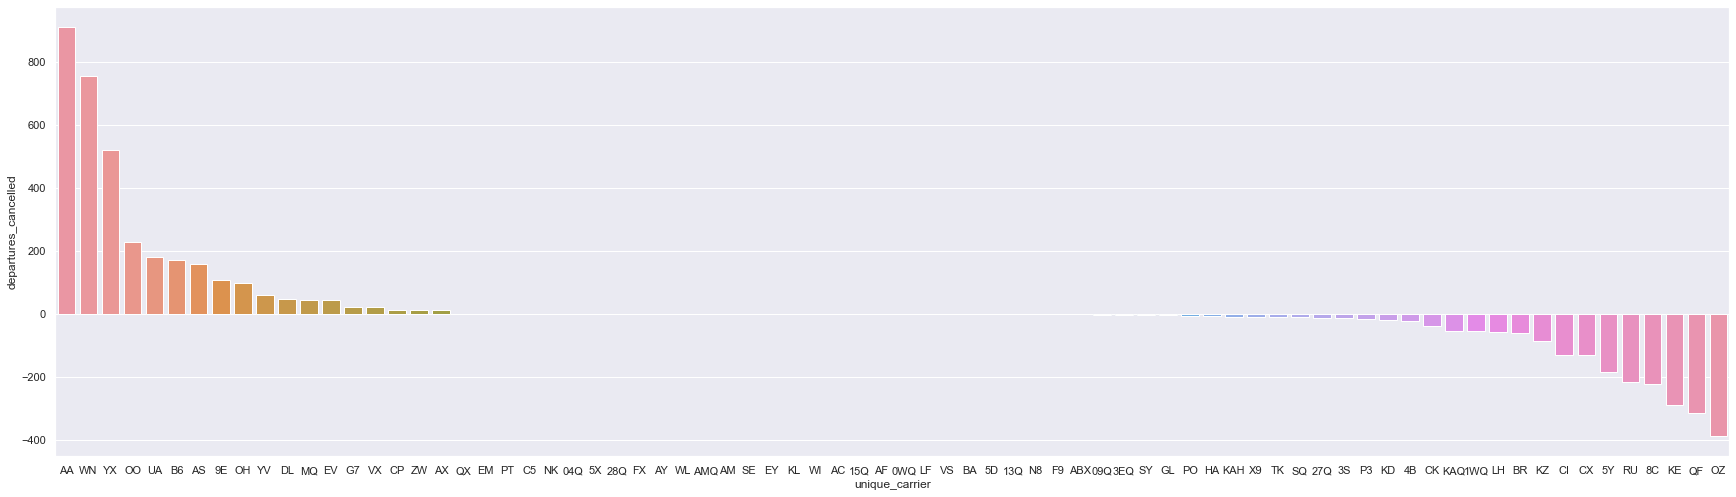

In [33]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(30,8.27)})
tips = sns.load_dataset("tips")
ax = sns.barplot(x="unique_carrier", y="departures_cancelled", data=departure_data)

### The graph above shows that there are a considerable number of flights that are not scheduled, yet still take place. I've tried to look up information about these flights in the `flights` table but they are hard to track as both the `unique_carrier` and `unique_carrier_name` are not present in the `flights` table

In [34]:
flights[flights['op_unique_carrier'] =='OZ']

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,origin_wind_speed,origin_visibility,origin_conditions,dest_wind_speed,dest_visibility,dest_conditions,holiday,year,month,scheduled_flight_hour_of_day


## Flights Table Analysis

In [35]:
flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'day_of_the_week', 'origin_wind_speed',
       'origin_visibility', 'origin_conditions', 'dest_wind_speed',
       'dest_visibility', 'dest_conditions', 'holiday', 'year', 'month',
       'scheduled_flight_hour_of_day'],
      dtype='object')

In [36]:
mean_ = flights['arr_delay'].mean()
max_ = flights['arr_delay'].max()
min_ = flights['arr_delay'].min()

print(f'Mean flight delay: {mean_}\nMax flight delay: {max_}\nMin flight delay: {min_}')

Mean flight delay: 2.787263772987551
Max flight delay: 1557.0
Min flight delay: -208.0


<AxesSubplot:xlabel='arr_delay', ylabel='Count'>

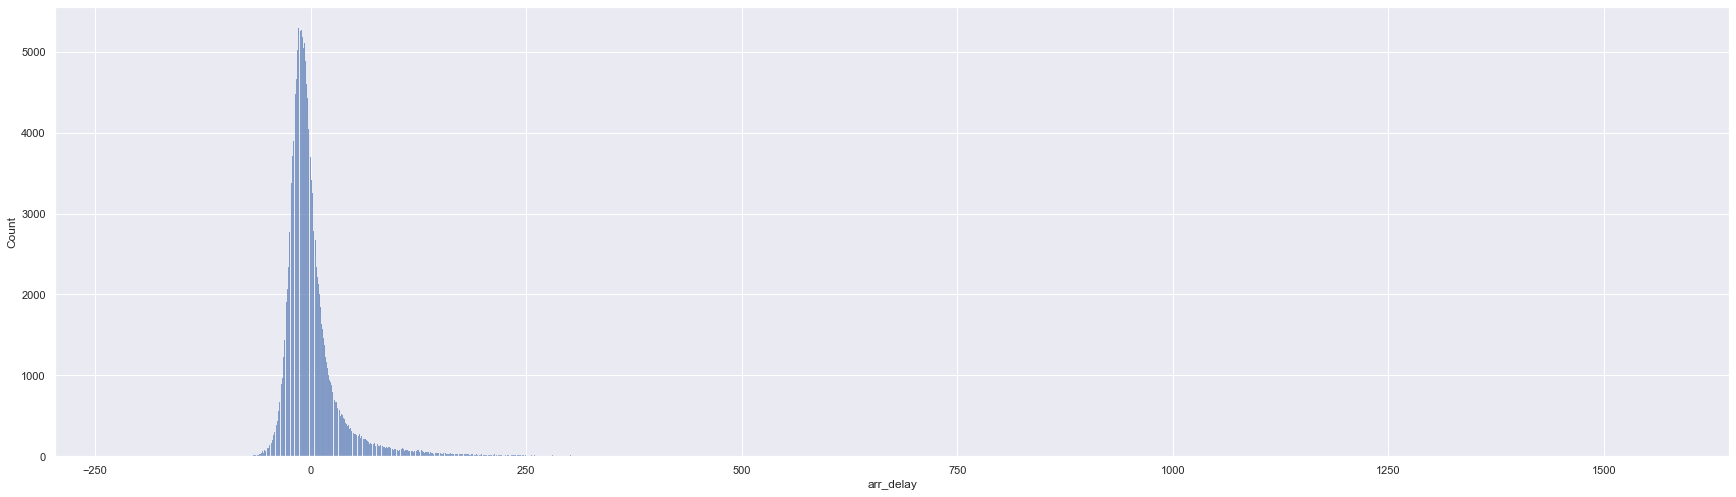

In [37]:
sns.histplot(data=flights, x="arr_delay")

<AxesSubplot:xlabel='arr_delay_scaled', ylabel='Count'>

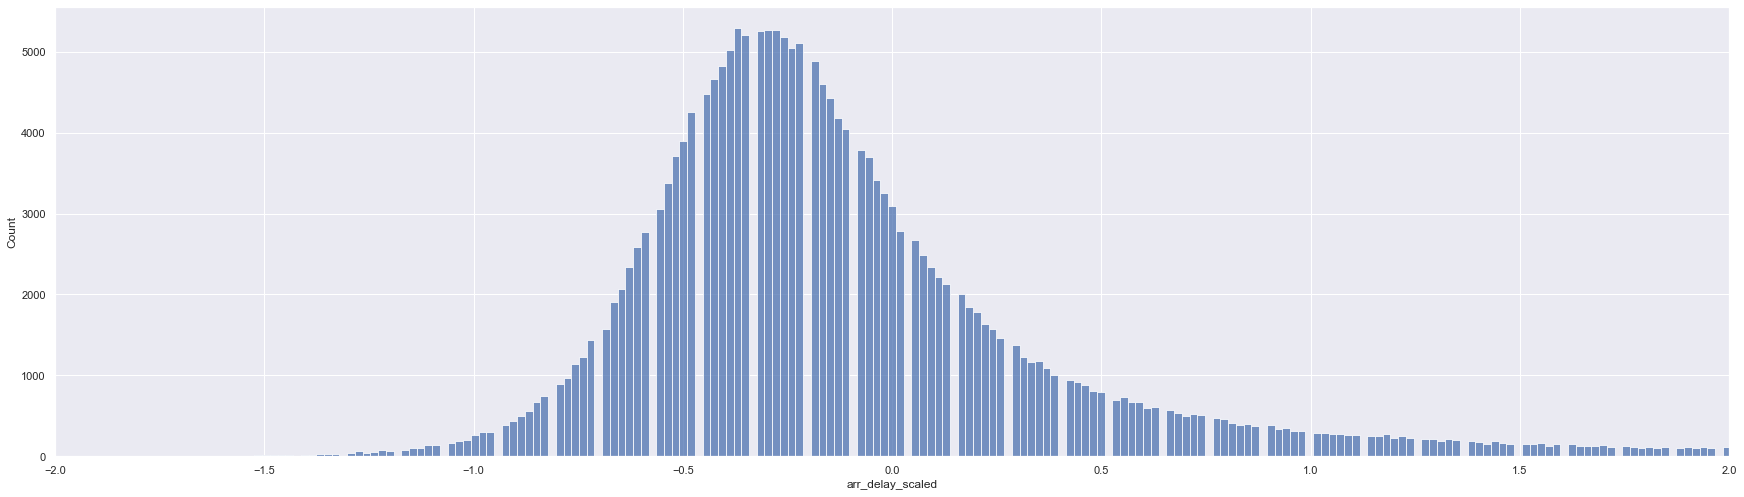

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # create a scalar
hist_x = scaler.fit(flights['arr_delay'].values.reshape(-1,1)) # teach the scalar the arr_delay values
hist_x = hist_x.transform(flights['arr_delay'].values.reshape(-1,1)) # transform the values on a scale from 0 to 1
hist_x = pd.DataFrame(hist_x) # convert to a dataframe to pass into sns object

rename_dict = {0 : 'arr_delay_scaled'} # creating a dictionary we will use in the next step (below)
hist_x = hist_x.rename(columns=rename_dict)  #  rename the column 0 to arr_ddelay_scaled for clarity (using dictionary from line above)
flights_arr_delay=(hist_x-hist_x.mean())/hist_x.std()
plt.xlim(-2, 2)
sns.histplot(data=flights_arr_delay, x="arr_delay_scaled")

### The graph above looks skewed to the right - this is **not** a normal distribution.

In [39]:
mean_ = flights_arr_delay['arr_delay_scaled'].mean()
median_ = flights_arr_delay['arr_delay_scaled'].median()
mode_ = flights_arr_delay['arr_delay_scaled'].mode()[0]

In [40]:
print(f'mean: {mean_}')
print(f'median: {median_}')
print(f'mode: {mode_}')
#print('If the median and the mode are both to the LEFT of the mean, the distribution is RIGHT skewed. A Normal distribution would be symmetrical.')

mean: 2.0337626953204282e-15
median: -0.21308382998008793
mode: -0.365484628043523


In [41]:
three_sigma = []
for i in (flights_arr_delay['arr_delay_scaled']):
    if i < abs(flights_arr_delay['arr_delay_scaled'].std()*3):
        three_sigma.append(i)
    #print(i)
three_sigma = pd.DataFrame(three_sigma)

In [42]:
percentage_of_data_within_three_stds = len(three_sigma) / len(flights_arr_delay)
percentage_of_data_within_three_stds

0.9718727083252924

### For a 3 standard deviation range, a normal distribution would contain 99.730% of all datapoints. Our distribution only has 97.187%. This reinforces that our distribution is **not** normal.

# Look at weather conditions

### Conditions variables - could be used to identify delay types based on the weather

In [43]:
weather = flights[['origin_wind_speed', 'origin_visibility', 'origin_conditions', 'dest_wind_speed', 'dest_visibility' ,'dest_conditions']]

In [44]:
weather_conditions = weather[['origin_conditions', 'dest_conditions']]
weather_conditions_origin_conditions = weather_conditions['origin_conditions']
weather_conditions_origin_conditions = weather_conditions_origin_conditions.value_counts()

In [45]:
weather_conditions = weather[['origin_conditions', 'dest_conditions']]
weather_conditions_dest_conditions = weather_conditions['dest_conditions']
weather_conditions_dest_conditions = weather_conditions_dest_conditions.value_counts()

In [46]:
weather_conditions_totals = weather_conditions_origin_conditions + weather_conditions_dest_conditions
weather_conditions_totals

Partially cloudy          118627
Clear                      98412
Rain, Overcast             65236
Rain, Partially cloudy     51249
Overcast                   36502
Snow, Partially cloudy     14211
Rain                       10632
Snow, Overcast             10168
Snow                        9507
dtype: int64

# Notes:
- We may want to begin with the exploratory_analysis notebook to familiarize ourselves with the project (I think we should aim to answer as many as possible).
- We will have to specify a target variable by identifying which flights are delayed, and quantify this value
- We will need to eliminate all relevant columns from causing our data to be biased or overfitted (all delay columns need to be removed)

Some ideas:
- Check how many airports there are; how many flights per airport; how many passengers per flight
- Do some airports have more delays than others?
- Weather; how should we quantify this; by geographic area? magnitude (1-10)? What weather conditions should we look for? (might be worth a google to see what are common weather delays for flights in certain areas)
- Time of day, day of week (weekend?)

In [47]:
# look for "delay" columns, add to dictionary with column number as key
delay_list = {}

for i, name in enumerate(flights.columns):
    if ('delay') in (name):
        #print(name)
        delay_list[i] = name

In [48]:
delay_list

{16: 'dep_delay',
 23: 'arr_delay',
 33: 'carrier_delay',
 34: 'weather_delay',
 35: 'nas_delay',
 36: 'security_delay',
 37: 'late_aircraft_delay'}

In [49]:
flights['arr_delay'].value_counts().mean()

285.46164574616455

(-100.0, 300.0)

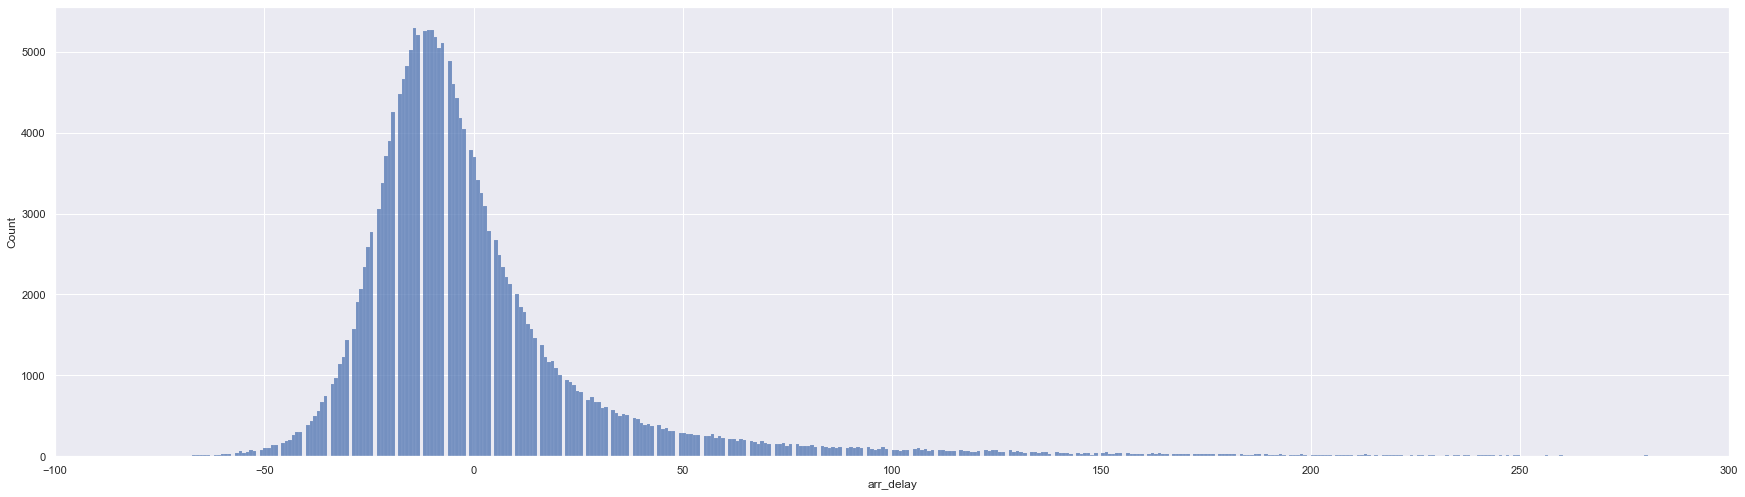

In [50]:
sns.histplot(data=flights, x="arr_delay")
plt.xlim(-100, 300)

In [51]:
df_filter = (flights['month'] == '12')
dec_flights = flights[df_filter].groupby(by=(['fl_date'])).mean()

In [52]:
df_filter = (flights['month'] == '12')
flights[df_filter]

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,origin_wind_speed,origin_visibility,origin_conditions,dest_wind_speed,dest_visibility,dest_conditions,holiday,year,month,scheduled_flight_hour_of_day
89236,2018-12-01,DL,DL,DL,2662,DL,N3772H,2662,12892,LAX,...,8.5,9.9,Clear,4.4,9.2,"Rain, Overcast",False,2018,12,17
85974,2018-12-01,WN,WN,WN,2025,WN,N432WN,2025,13232,MDW,...,20.6,3.8,"Rain, Overcast",9.2,9.9,"Rain, Partially cloudy",False,2018,12,15
85835,2018-12-01,DL,DL,DL,747,DL,N727TW,747,12478,JFK,...,9.2,9.9,"Rain, Partially cloudy",8.5,9.9,Clear,False,2018,12,11
85841,2018-12-01,AA,AA,AA,2,AA,N108NN,2,12892,LAX,...,8.5,9.9,Clear,9.2,9.9,"Rain, Partially cloudy",False,2018,12,9
89012,2018-12-01,AA,AA,AA,1414,AA,N339PL,1414,12478,JFK,...,9.2,9.9,"Rain, Partially cloudy",20.6,3.8,"Rain, Overcast",False,2018,12,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140619,2019-12-31,NK,NK,NK,918,NK,N905NK,918,11292,DEN,...,11.8,9.9,Clear,6.1,9.9,Clear,False,2019,12,19
106829,2019-12-31,WN,WN,WN,4807,WN,N277WN,4807,13232,MDW,...,25.3,7.9,"Snow, Overcast",15.3,8.7,Overcast,False,2019,12,8
106104,2019-12-31,AA,AA,AA,598,AA,N741UW,598,12953,LGA,...,19.3,9.6,"Rain, Partially cloudy",13.2,9.9,Clear,False,2019,12,13
103182,2019-12-31,UA,UA_CODESHARE,UA,3466,YX,N654RW,3466,11278,DCA,...,15.3,8.7,Overcast,25.3,7.9,"Snow, Overcast",False,2019,12,9


In [53]:
df_filter = (flights['month'] == '01')
jan_flights = flights[df_filter].groupby(by=(['fl_date'])).mean()

In [54]:
# **********
# DECEMBER
# year
year_vector = []
for i in dec_flights.index:
    year_vector.append(i[0:4])

dec_flights['year'] = year_vector

# day
day_vector = []
for i in dec_flights.index:
    #print((i[-2:]))
    day_vector.append(i[-2:])

dec_flights['day'] = day_vector


# **********
# JANUARY

# year
year_vector = []
for i in jan_flights.index:
    year_vector.append(i[0:4])

jan_flights['year'] = year_vector

# day
day_vector = []
for i in jan_flights.index:
    #print((i[-2:]))
    day_vector.append(i[-2:])

jan_flights['day'] = day_vector

In [55]:
#jan_flights[:60]

Text(0.5, 1.0, 'January arr_delay')

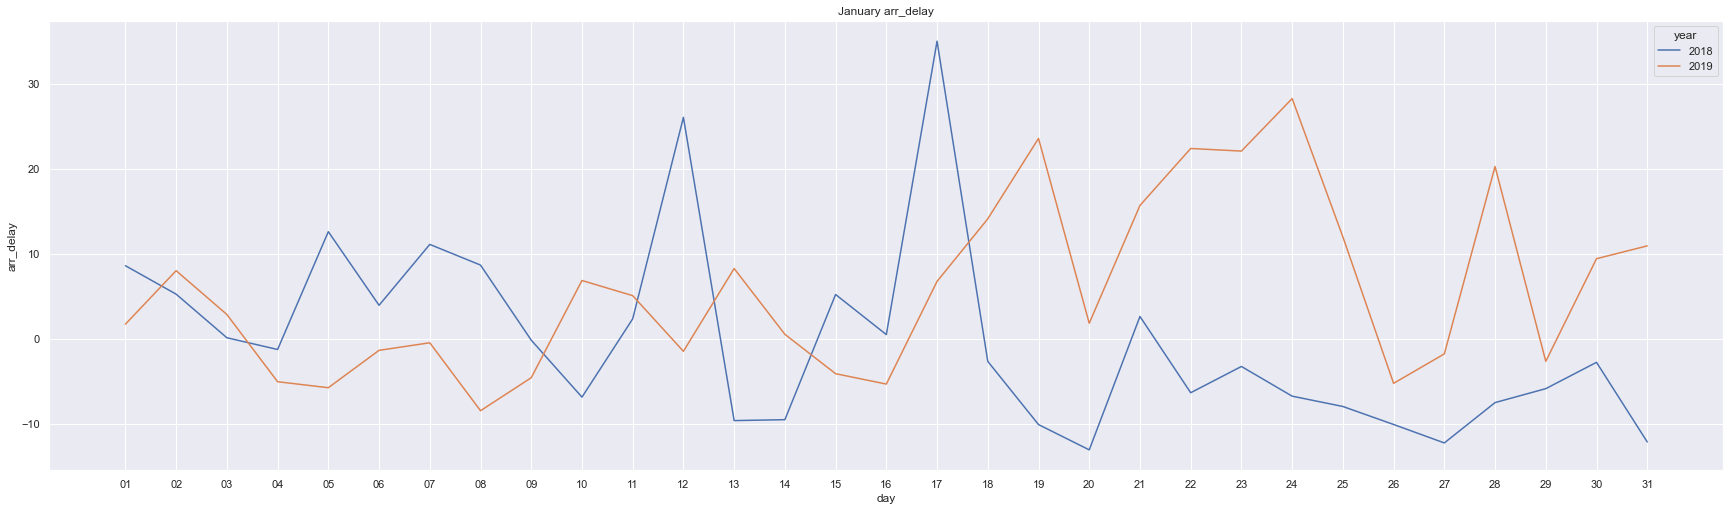

In [56]:
sns.set_style("darkgrid")
sns.lineplot(data=jan_flights, x='day', y='arr_delay', hue='year', estimator=None).set_title('January arr_delay')

Text(0.5, 1.0, 'December arr_delay')

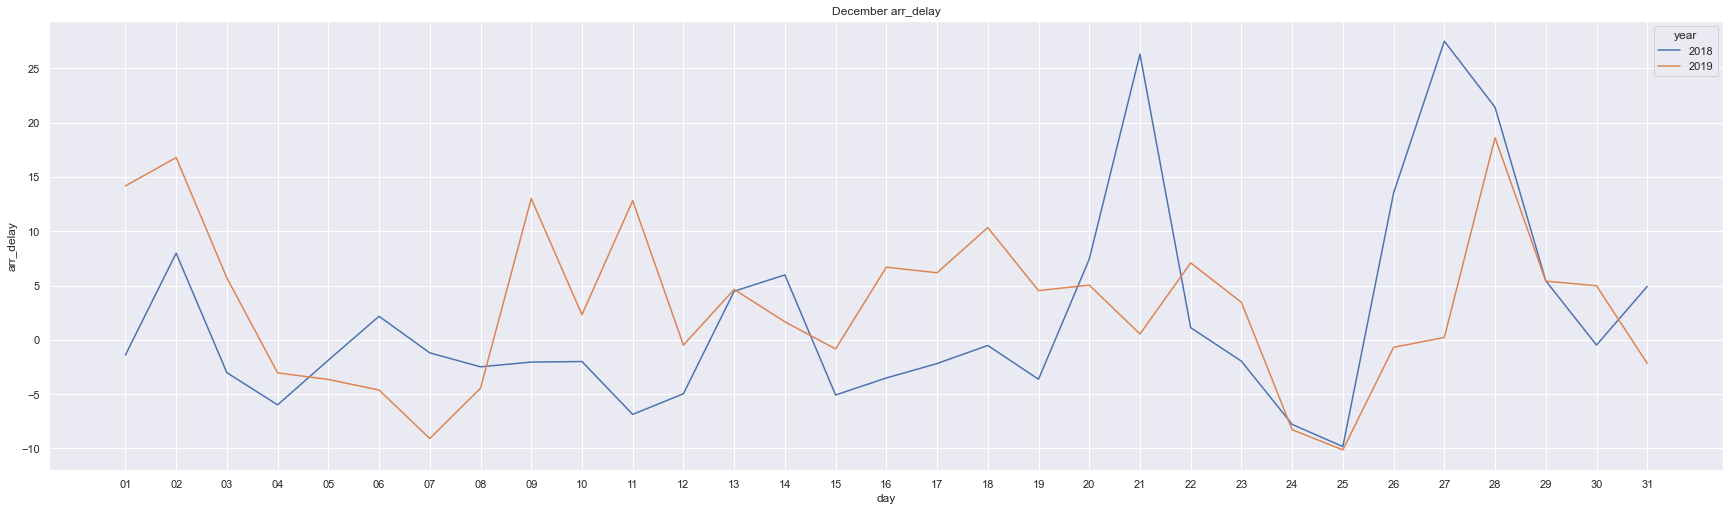

In [57]:
sns.set_style("darkgrid")
sns.lineplot(data=dec_flights, x='day', y='arr_delay', hue='year', estimator=None).set_title('December arr_delay')

Text(0.5, 1.0, 'City arr_delay')

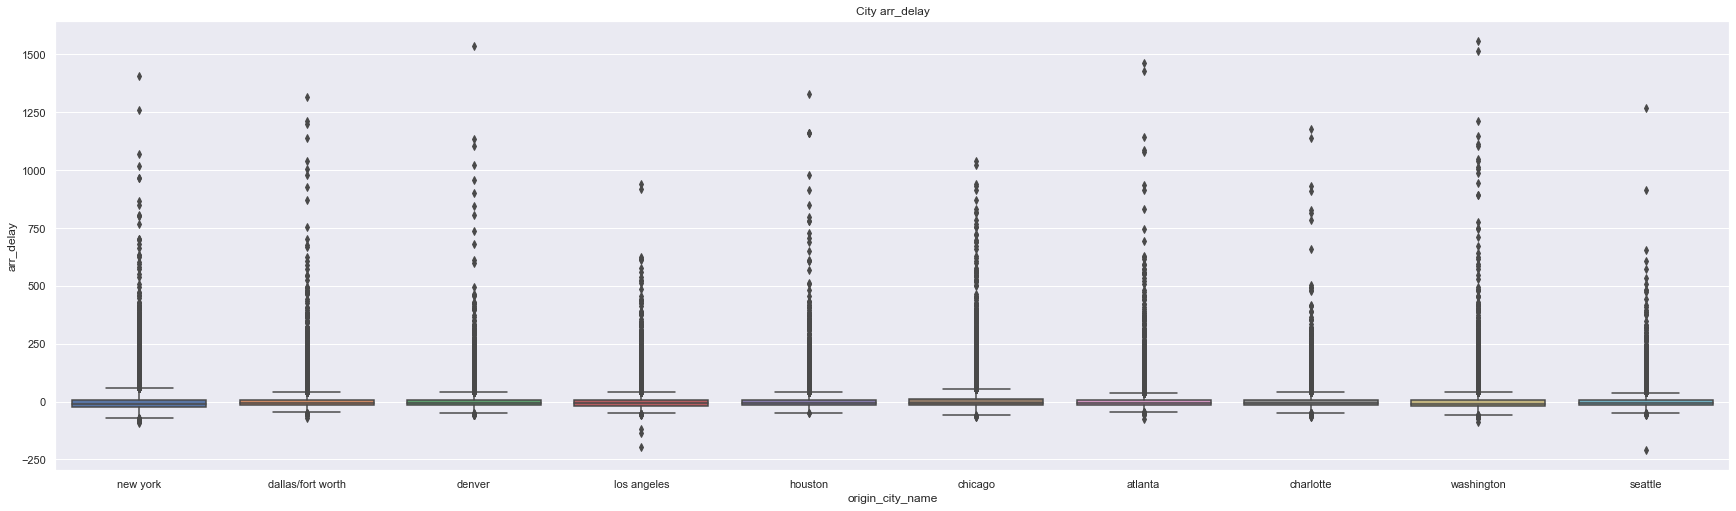

In [58]:
sns.set_style("darkgrid")
sns.boxplot(x='origin_city_name', y="arr_delay", data=flights).set_title('City arr_delay')

In [59]:
flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'day_of_the_week', 'origin_wind_speed',
       'origin_visibility', 'origin_conditions', 'dest_wind_speed',
       'dest_visibility', 'dest_conditions', 'holiday', 'year', 'month',
       'scheduled_flight_hour_of_day'],
      dtype='object')

In [60]:
flights_test = flights.copy()

In [61]:
flights_test.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'day_of_the_week', 'origin_wind_speed',
       'origin_visibility', 'origin_conditions', 'dest_wind_speed',
       'dest_visibility', 'dest_conditions', 'holiday', 'year', 'month',
       'scheduled_flight_hour_of_day'],
      dtype='object')